## 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('boston.csv')

df.head()

,Unnamed: 0,MEDV,RM
0,0,24.0,6.575
1,1,21.6,6.421
2,2,34.7,7.185
3,3,33.4,6.998
4,4,36.2,7.147


In [2]:
x_data = df['RM'].values
y_data = df['MEDV'].values

## 解析解

Slope: 9.102
Intercept: -34.671


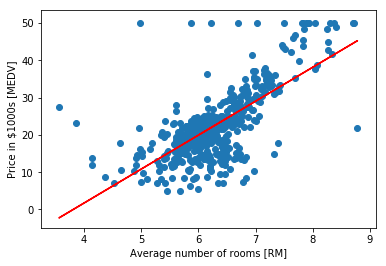

In [3]:
x_data = df[['RM']].values
y_data = df['MEDV'].values

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(x_data, y_data)
y_pred = slr.predict(x_data)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

plt.plot(x_data, y_pred, 'r-')
plt.scatter(x_data[:],y_data[:])
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.savefig("./image/image_22.png")
plt.show()

## 梯度下降法

### 面向过程

In [4]:
# 面向对象编程
# ydata = b + w * xdata 
b = 0 # initial b
w = 0 # initial w
lr = .00001 # learning rate
iteration = 10000
# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters.
    b = b - lr* b_grad 
    w = w - lr* w_grad
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

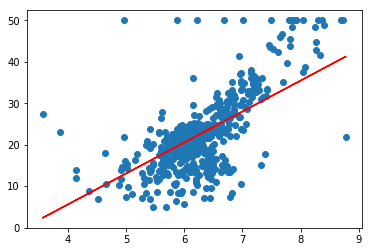

In [5]:
plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], x_data * w + b, 'r-')
#plt.savefig("./image/image_16.png") 

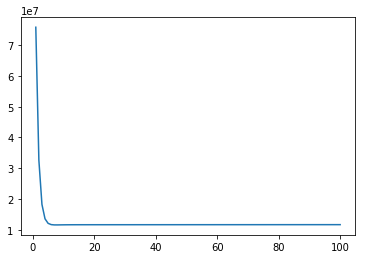

In [6]:
error = [np.sum((x_data * w_history[i] + b_history[i]-y_data)**2 / 2) for i in range(len(w_history))]
plt.plot(range(1,101), error[:100])

### 面向对象

In [23]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.00001, n_iter=10000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + 1)
        self.cost_ = []
        self.w_history = []
        self.b_history = []
        #self.w_[1] = -50
        #self.w_[0] = -50

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_history.append(self.w_[1])
            self.b_history.append(self.w_[0])
            self.w_[1] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [24]:
x_data = df['RM'].values
y_data = df['MEDV'].values

lr = LinearRegressionGD()
lr.fit(x_data, y_data)
print(lr.w_[1:], lr.w_[0])
print( lr.cost_[-1])

[6.08799943] -15.497514252726404
12176.969008953525


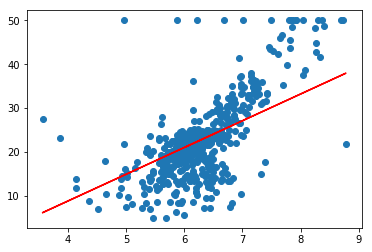

In [25]:
plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], lr.predict(x_data), 'r-')
#plt.savefig("./image/image_16.png")

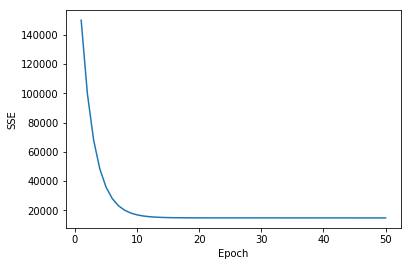

In [9]:
plt.plot(range(1,51), lr.cost_[:50])
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.savefig("./image/image_17.png")
plt.show()

#### 归一化

In [10]:
x_data = df[['RM']].values
y_data = df['MEDV'].values

# 归一化
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data.reshape(-1, 1)).reshape(506)

lr = LinearRegressionGD()
lr.fit(x_data, y_data)
print(lr.w_[1:], lr.w_[0])
print( lr.cost_[-1])

[28.93594881] 7.57134326567446
12613.879032657776


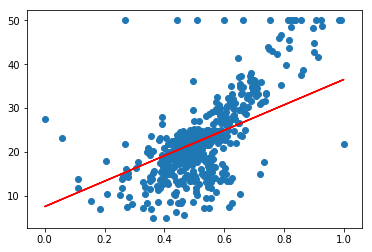

In [11]:
plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], lr.predict(x_data), 'r-')
#plt.savefig("./image/image_18.png")

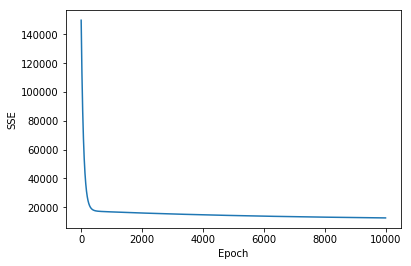

In [12]:
plt.plot(range(1,10001), lr.cost_[:10000])
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.savefig("./image/image_19.png")
plt.show()

#### 标准化

In [13]:
x_data = df[['RM']].values
y_data = df['MEDV'].values

# 标准化
from sklearn import preprocessing

stdsc = preprocessing.StandardScaler()
x_data = stdsc.fit_transform(x_data.reshape(-1, 1)).reshape(506)
#y_data = stdsc.fit_transform(y_data.reshape(-1, 1)).reshape(506)

lr = LinearRegressionGD()
lr.fit(x_data, y_data)
print(lr.w_[1:], lr.w_[0])
print( lr.cost_[-1])

[6.38897522] 22.53280632411032
11030.9395981059


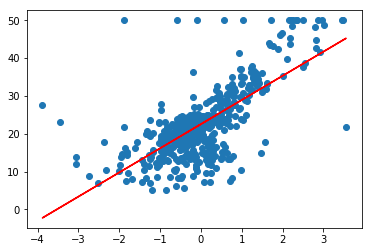

In [14]:
plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], lr.predict(x_data), 'r-')
#plt.savefig("./image/image_20.png")

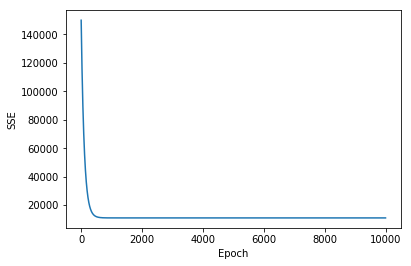

In [15]:
plt.plot(range(1,10001), lr.cost_[:10000])
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.savefig("./image/image_21.png")
plt.show()

## 梯度下降法的变种算法

### 随机梯度下降法（SGD）

#### sklearn

C:\Users\111\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\111\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Slope: 6.250
Intercept: 22.326


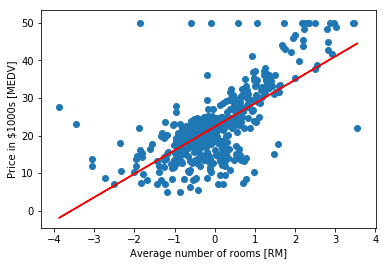

In [16]:
from sklearn.linear_model import SGDRegressor

x_data = df[['RM']].values
y_data = df[['MEDV']].values

# 标准化
from sklearn import preprocessing

stdsc = preprocessing.StandardScaler()
x_data = stdsc.fit_transform(x_data)

sgd = SGDRegressor()
sgd.fit(x_data, y_data)
y_pred = sgd.predict(x_data)

print('Slope: %.3f' % sgd.coef_[0])
print('Intercept: %.3f' % sgd.intercept_)

plt.plot(x_data, y_pred, 'r-')
plt.scatter(x_data[:],y_data[:])
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig("./image/image_22.png")
plt.show()

### 面向过程

In [17]:
import random
# ydata = b + w * xdata 
b = 0 # initial b
w = 0 # initial w
lr = .00001 # learning rate
iteration = 100000
# Store initial values for plotting.
b_history = [b]
w_history = [w]

for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    n = random.randint(0,len(y_data)-1)
    b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
    w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # Update parameters.
    b = b - lr* b_grad 
    w = w - lr* w_grad
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

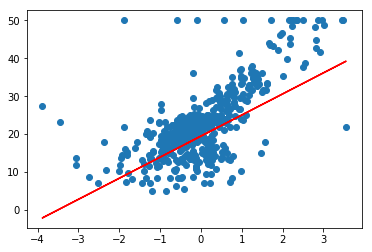

In [18]:
plt.scatter(x_data[:],y_data[:])
plt.plot(x_data[:], x_data * w + b, 'r-')
#plt.savefig("./image/image_16.png") 

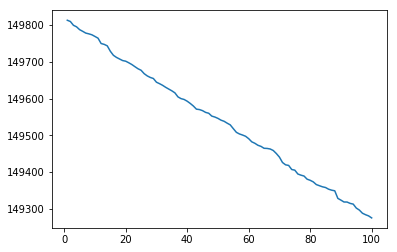

In [19]:
error = [np.sum((x_data * w_history[i] + b_history[i]-y_data)**2 / 2) for i in range(len(w_history))]
plt.plot(range(1,101), error[:100])

In [20]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.00001, n_iter=10000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + 1)
        self.cost_ = []
        self.w_history = []
        self.b_history = []
        #self.w_[1] = -50
        #self.w_[0] = -50

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_history.append(self.w_[1])
            self.b_history.append(self.w_[0])
            self.w_[1] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

## 自适应学习率

In [21]:
b = 0
w = 0
lr = 1 # learning rate
iteration = 10000

b_lr = 0.0
w_lr = 0.0

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0 / len(x_data)
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n] / len(x_data)
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters.
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

KeyboardInterrupt: 